### Compare Subnational to SVI
Compare subnational data to SVI data in the USA.

#### 1. Clean Data

In [1]:
# Import functions
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt # display
import seaborn as sns # display

In [2]:
# set wd
wd_path = "C:\\Users\\rcompos\\OneDrive - North Carolina State University\\Documents\\Research\\SVI_Flood_Project"
os.chdir(wd_path)
os.getcwd() # get wd
#os.listdir() # get available data

'C:\\Users\\rcompos\\OneDrive - North Carolina State University\\Documents\\Research\\SVI_Flood_Project'

In [3]:
# Set data paths
sub = pd.read_csv("Subnational\\sub_pov - selections.csv")
svi_cnty = pd.read_csv("SVI\\SVI2020_US_COUNTY.csv")
svi_tra = pd.read_csv("SVI\\SVI2020_US_tract.csv")

In [4]:
# View data

#sub.head(5)
#svi_cnty.head(5)
#svi_tra.head(5)
#sub.dtypes
#svi_cnty.dtypes


In [5]:
# Prep subnational data to add to svi
sub_usa = sub[sub['code'] == 'USA'] # select usa data
#len(sub_usa) # 51, includes D.C.
#print(sub_usa[['STATE']].to_string(index=False)) # get list of states

sub_usa = sub_usa.rename(columns = {'State':'STATE','Mean Rank (SVI)':'sub_mean_rank'}) # rename column to match svi data
sub_usa = sub_usa[['STATE','sub_mean_rank']] # select columns
sub_usa['sub_mean_rank'] = sub_usa['sub_mean_rank'].astype(float)
#print(sub_usa.dtypes)

#sub_usa.head()


In [6]:
# Code to group & filter svi data

# Group svi data by state
#svi_st_m = svi_cnty.groupby('STATE').mean().reset_index()
# svi_st_m_s = svi_st_m.iloc[:,np.r_[0, 11:40]] # filter columns
#len(svi_st_m) # 51, includes D.C.
#svi_st_m_s.head(5)
#print(svi_st_m[['STATE']].to_string(index=False)) # get list of states

In [7]:
# Combine svi & subnational datasets

# Combine by state median
svi_st_med = svi_cnty.groupby('STATE').median().reset_index()
svi_st_med_merged = pd.merge(sub_usa, svi_st_med, on =['STATE'], how = 'left')
#svi_st_med_merged.head()

# Combine by state mean
svi_st_m = svi_cnty.groupby('STATE').mean().reset_index()
svi_st_merged = pd.merge(sub_usa, svi_st_m, on =['STATE'], how = 'left')
#svi_st_merged.head()
#svi_merged.dtypes

# Combine by county
svi_cnty_merged = pd.merge(svi_cnty, sub_usa, on =['STATE'], how = 'left')
#svi_cnty_merged.head()

# Combine by tract
svi_tra_merged = pd.merge(svi_tra, sub_usa, on =['STATE'], how = 'left')
#svi_tra_merged.head()


#### 2. Compare w/ simple linear correlation


*Notes:* Closer to 0 is less correlated & closer to 1 or -1 is more correlated, datasets must be same length

*Source:*  https://www.geeksforgeeks.org/exploring-correlation-in-python/

In [9]:
# Find the pearson correlations matrix

# By state median
svi_st_med_corr = svi_st_med_merged.corr(method = 'pearson') # run correlation
print('Rank by State svi median')
print(svi_st_med_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(7)) # order results
print()

# By state mean
svi_st_corr = svi_st_merged.corr(method = 'pearson') # run correlation
print('Rank by State svi mean')
print(svi_st_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(7)) # order results
print()

# By county
svi_cnty_corr = svi_cnty_merged.corr(method = 'pearson') # run correlation
print('Rank by County')
print(svi_cnty_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(3)) # order results
print()

# By tract
svi_tra_corr = svi_tra_merged.corr(method = 'pearson') # run correlation
#print('Rank by Tract')
#print(svi_tra_corr[['sub_mean_rank']].sort_values(by='sub_mean_rank', ascending=False).head(5)) # order results


Rank by State svi median
               sub_mean_rank
sub_mean_rank       1.000000
EP_NOHSDP           0.638436
EPL_NOHSDP          0.637651
RPL_THEME1          0.607627
SPL_THEME1          0.600100
EP_NOINT            0.579451
RPL_THEMES          0.578293

Rank by State svi mean
               sub_mean_rank
sub_mean_rank       1.000000
EPL_NOHSDP          0.642151
EP_NOHSDP           0.629543
RPL_THEME1          0.610676
RPL_THEMES          0.610454
SPL_THEMES          0.606817
SPL_THEME1          0.605124

Rank by County
               sub_mean_rank
sub_mean_rank       1.000000
EP_AFAM             0.490767
RPL_THEME1          0.473343



In [78]:
# just themes
svi_st_corr_trim = svi_st_corr[['RPL_THEMES','RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','sub_mean_rank']]
svi_st_corr_trim.head(1)

,RPL_THEMES,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,sub_mean_rank
sub_mean_rank,0.610454,0.610676,0.451117,0.466731,0.406255,1.0


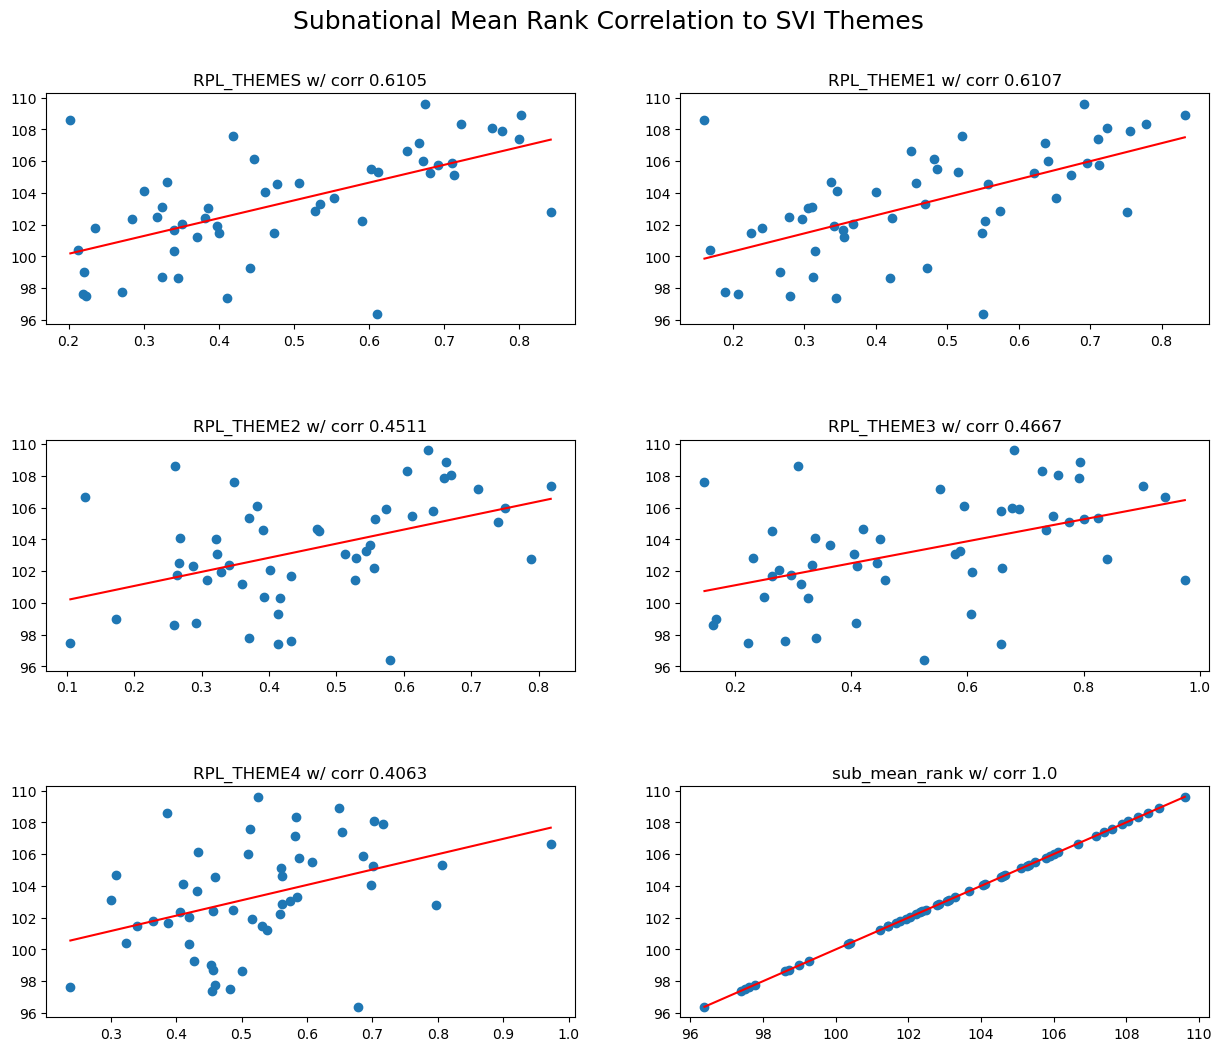

In [80]:
# Create subplots of subnational & svi themes
big_themes = ['RPL_THEMES','RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','sub_mean_rank']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Subnational Mean Rank Correlation to SVI Themes", fontsize=18, y=0.95)

# Loop through indices of correlation
for svi_col, ax in zip(big_themes, axs.ravel()):   
        y=svi_st_merged['sub_mean_rank']
        x=svi_st_merged[svi_col]

        correlation = y.corr(x)

        plt.plot(ax=ax)

        # plot the data
        ax.scatter(x, y)
 
        # fits the best fitting line to the data
        ax.plot(np.unique(x),
            np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color='red')
        
        ax.set_title(svi_col +" w/ corr " + str(round(correlation,4)))

plt.show()

In [76]:
# Select subset of SVI columns w/ higher correlation to subnational data

# select all attributes in svi that have correlation w/ sub_mean_rank of >0.5 and <-.2
svi_st_corr_sel = svi_st_corr[(svi_st_corr['sub_mean_rank'] < -.2) | (svi_st_corr['sub_mean_rank'] > .5)]
#print(len(svi_st_corr_sel))
#print(svi_st_corr_sel[['sub_mean_rank']].head(15))

# create a list of these variables w/ these correlations
svi_st_corr_sel = svi_st_corr_sel.sort_values(by='sub_mean_rank', ascending=False)
iteratethis = svi_st_corr_sel.index.values.tolist()
#print(iteratethis)
print(len(iteratethis))

18


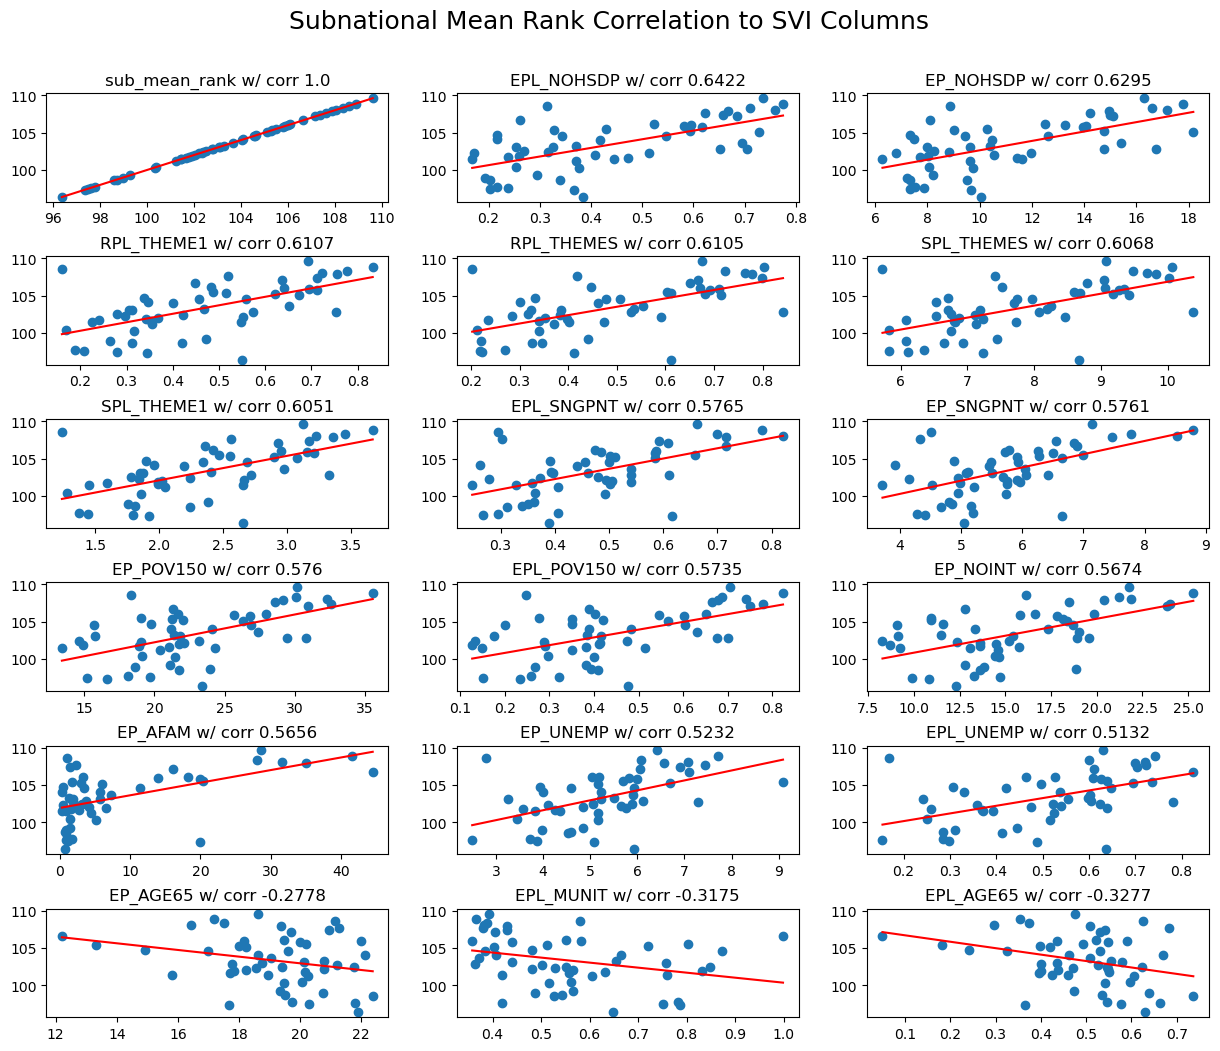

In [77]:
# Create subplots of subnational & svi correlation
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Subnational Mean Rank Correlation to SVI Columns", fontsize=18, y=0.95)

# Loop through indices of correlation
for svi_col, ax in zip(iteratethis, axs.ravel()):   
        y=svi_st_merged['sub_mean_rank']
        x=svi_st_merged[svi_col]

        correlation = y.corr(x)

        plt.plot(ax=ax)

        # plot the data
        ax.scatter(x, y)
 
        # fits the best fitting line to the data
        ax.plot(np.unique(x),
            np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color='red')
        
        ax.set_title(svi_col +" w/ corr " + str(round(correlation,4)))

plt.show()

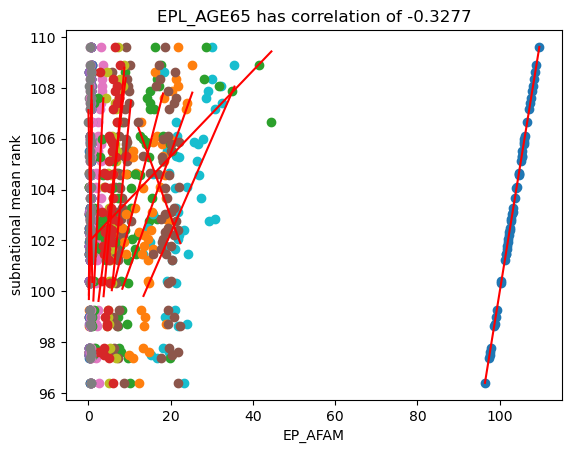

In [79]:
# Create individual plots of correlation
# Loop through certain indeces of correlation
# plotting the data
for svi_col in iteratethis:   
        y=svi_st_merged['sub_mean_rank']
        x=svi_st_merged[svi_col]

        correlation = y.corr(x)

        # adds the title
        plt.title(svi_col +" has correlation of " + str(round(correlation,4)))
 
        # plot the data
        plt.scatter(x, y)
 
        # fits the best fitting line to the data
        plt.plot(np.unique(x),
            np.poly1d(np.polyfit(x, y, 1))
            (np.unique(x)), color='red')
 
        # Labelling axes
        plt.xlabel(i)
        plt.ylabel('subnational mean rank')
        
        #plt.show()

Definitions from "SVI2020Documentation"

EPL_NOHSDP: Percentile percentage of persons with no high school diploma (age 25+) estimate
EP_NOHSDP: Percentage of persons with no high school diploma (age 25+) estimate
RPL_THEMES: Overall percentile ranking
SPL_THEMES: Sum of series themes
RPL_THEME1: Percentile ranking for Socioeconomic Status theme summary
SPL_THEME1: Sum of series for Socioeconomic Status theme

Four Themes: Socioeconomic status, househould characteristics, racial & ethnic minority status, housing type/transportation

In [ ]:
# Other display options
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(svi_st_corr.head(10),annot=True,fmt=".2f", linewidth=.5)
plt.show()

#### 3. Add in HRLS Data (incomplete!!)

Sources: https://shakasom.medium.com/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea

In [ ]:
# importing libraries
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

In [ ]:
# paths
hrls_kid = pd.read_csv("HRLS\\USA_children_under_five_2020-03-07.csv")
hrls_kid.head(-5)

In [ ]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(hrls_kid['longitude'], hrls_kid['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(hrls_kid, crs=crs, geometry=geometry)

In [ ]:
gdf.head()

In [ ]:
# Plot all points
gdf.plot(marker='o', color='b', markersize=0.5)

In [ ]:
# upload states file
states_path = "States_Shape\\cb_2018_us_state_20m.shp"
states_shape = gpd.read_file(states_path)

In [ ]:
# Join HRLS points to the states shapefile
hrls_joined = gpd.sjoin(gdf, world, how="inner", op='within')
hrls_joined.head(3)

In [ ]:
# Aggregate points to state level
hrls_states = hrls_joined.groupby('NAME').agg('sum') # other options STUSPS (MD,IA,etc.), GEOID (24,19)
hrls_states.head(3)

#### 4. Combine HRLS & Subnational Data

In [ ]:
# combine HRLS and subnational data
# new = d.merge(sub_usa, hrls, on =['STATE'], how = 'left')

# take average of the 3 averages